In [91]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [93]:
def Estado_iteracion(epoch, a, b, funcion_perdida):
    print('\nEpoch {}'.format(epoch))
    print('\t y = {a:0.4f}X + {b:0.4f}'.format(a=a, b=b))
    print('\tFunción de perdida = {:0.4f}'.format(funcion_perdida))

In [95]:
def convergencia(a_nuevo, b_nuevo, a_viejo, b_viejo, tolerancia):
    return math.fabs(a_nuevo - a_viejo) < tolerancia and math.fabs(b_nuevo - b_viejo) < tolerancia

In [105]:
def regresion_lineal(X, y, alpha, n_epoch, tolerancia, verbose=False):
    a_nuevo, b_nuevo = (random.randrange(0,10),)*2
    a_viejo, b_viejo = (tolerancia,)*2
    contador = 0
    errores = []
    while not convergencia(a_nuevo, b_nuevo, a_viejo, b_viejo, tolerancia) and contador < n_epoch:
        a_viejo = a_nuevo
        b_viejo = b_nuevo
        funcion_perdida, sum_a, sum_b = 0,0,0
        for i, elem in enumerate(X):
            hipotesis = (a_viejo*X[i]) + b_viejo
            error = hipotesis - y[i]
            funcion_perdida += math.pow(error,2)
            sum_a += error*X[i]
            sum_b += error
        a_nuevo = a_viejo - alpha*(sum_a/len(X))
        b_nuevo = b_viejo - alpha*(sum_b/len(X))
        funcion_perdida = funcion_perdida/(2*len(X))
        errores.append(funcion_perdida)
        contador += 1
        if verbose:
            Estado_iteracion(contador, a_nuevo, b_nuevo, funcion_perdida)
    return a_nuevo, b_nuevo, errores

In [107]:
df_raw = pd.read_csv('C:/Users/Franc/Downloads/precio_casas.csv', sep=';', header=0)
df_raw.sample(5)

,pies_cuadrados_casa,num_banios,num_habitaciones,num_cocinas,num_coches_garaje,pies_cuadrados_garaje,precio_dolares
553,1446,2,3,1,2,406,175000
1068,1258,2,3,1,2,528,145000
583,1473,1,1,1,1,452,143000
165,1355,2,4,2,0,0,127500
777,1342,2,3,1,2,457,161500


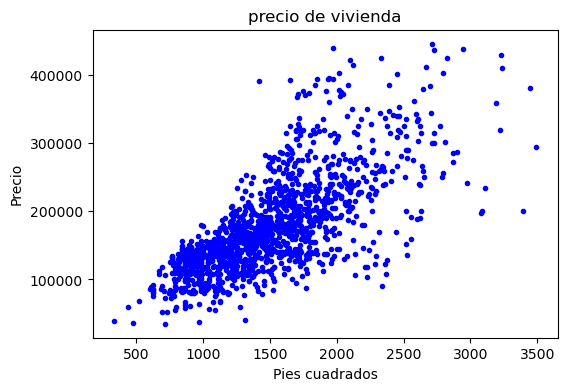

In [109]:
X = df_raw['pies_cuadrados_casa'].values
y = df_raw['precio_dolares'].values
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X, y, color='blue', marker='.')
ax.set_title("precio de vivienda")
ax.set_xlabel("Pies cuadrados")
ax.set_ylabel("Precio")
plt.show()

In [115]:
X_mean = X.mean()
X_std = X.std()
X_norm = (X - X_mean) / X_std

y_mean = y.mean()
y_std = y.std()
y_norm = (y - y_mean) / y_std

In [353]:
random.seed(42)
a, b, errores = regresion_lineal(X=X_norm, y=y_norm, alpha=0.001, n_epoch=2500, tolerancia=0.0001, verbose=False)

In [355]:
a_final = (y_std / X_std) * a
b_final = y_mean + y_std * b - a_final * X_mean

In [357]:
print(a_final, b_final)

107.15926361285412 24041.721861335216


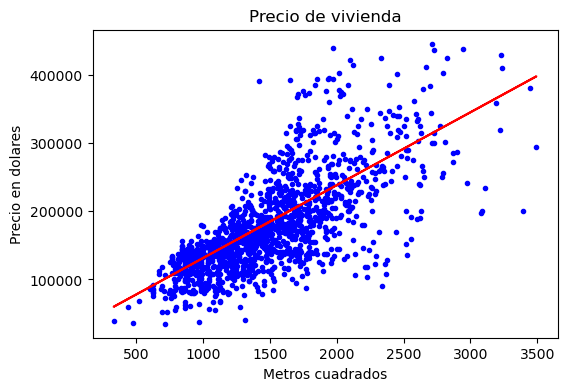

In [359]:
fig, ax =  plt.subplots(figsize=(6, 4))
ax.scatter(X, y,  color='blue', marker='.', )
ax.plot(X, [(a_final*x + b_final) for x in X], color='red')
ax.set_title("Precio de vivienda")
ax.set_xlabel("Metros cuadrados")
ax.set_ylabel("Precio en dolares")
plt.show()

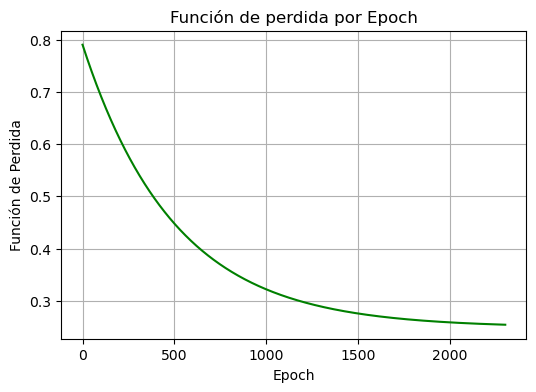

In [361]:
fig, ax =  plt.subplots(figsize=(6, 4))
ax.plot([index for index, value in enumerate(errores)], [error for error in errores], color='green')
ax.set_title("Función de perdida por Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Función de Perdida")
ax.grid(True)
plt.show()